In [20]:
#Importing various models needed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import mnist
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
train_X = mnist.train_images()
train_Y = mnist.train_labels()
test_X = mnist.test_images()
test_Y = mnist.test_labels()

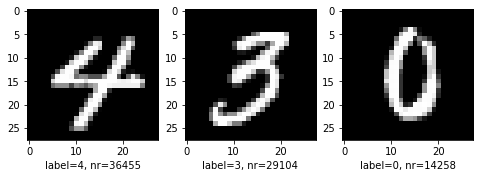

In [22]:
#Showing sample training data with label
from random import sample
ints = sample(range(0,60000),3)
fig = plt.figure(figsize=(8, 8))
for i in range(1,4):
    fig.add_subplot(1,3,i)
    plt.imshow(train_X[ints[i-1]], cmap='gray')
    plt.xlabel(f"label={train_Y[ints[i-1]]}, nr={ints[i-1]}")
plt.show()

In [23]:
#Reshaping so that scikit-learn can use it
nsamples, nx, ny = train_X.shape
d2_train_X = train_X.reshape((nsamples,nx*ny))

In [24]:
#Using Random Forest from scikit-learn to create classifier 
rf_clf = RandomForestClassifier(random_state=50)
rf_clf.fit(d2_train_X, train_Y)

RandomForestClassifier(random_state=50)

In [25]:
#Reshaping test set
nsamples, nx, ny = test_X.shape
d2_test_X = test_X.reshape((nsamples,nx*ny))

In [26]:
#Predicting the digits in the test set
pred = rf_clf.predict(d2_test_X)
acc = accuracy_score(test_Y,pred)
print(f"Accuracy on test set was: {acc}")

Accuracy on test set was: 0.9692


In [27]:
#Showing the confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix")
print(confusion_matrix(test_Y, pred))

Confusion matrix
[[ 970    0    0    0    0    1    4    1    4    0]
 [   0 1123    3    2    0    2    3    1    1    0]
 [   6    0 1000    4    3    1    4    8    6    0]
 [   0    0   11  968    1    9    0   10    8    3]
 [   2    0    0    0  951    1    7    1    3   17]
 [   3    0    1   12    2  863    4    2    4    1]
 [   7    3    1    0    4    3  938    0    2    0]
 [   1    3   18    2    2    0    0  988    2   12]
 [   5    0    5    4    6    8    3    4  929   10]
 [   9    5    1   12   10    3    1    2    4  962]]


Our test-picture:


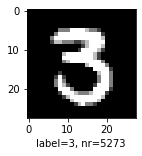

The classifier predicts that this digit is: 3


In [28]:
#Showing a test number
from random import randint
n=randint(0,10000)
test = test_X[n]
fig = plt.figure(figsize=(2,2))
plt.imshow(test, cmap="gray")
plt.xlabel(f"label={test_Y[n]}, nr={n}")
print("Our test-picture:")
plt.show()

#Let the classifier predict what number it is
nx, ny = test.shape
test = test.reshape((1,nx*ny))
pred = rf_clf.predict(test)
print(f"The classifier predicts that this digit is: {pred[0]}")